## Task 1
For Task 1
- First, I will do the preprocessing in order that is specified in the Assignment Instruction. So I make make sure all the methods work properly and all the output of each steps can be seen.
- Then I will implement a preprocessing function that includes steps from above and adhere to the best practices (according to my understanding) then apply it to the original dataset

In [275]:
import pandas as pd


In [276]:
df = pd.read_csv("Cars.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [277]:
# Checking what are possible values and how many of them
df["owner"].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [278]:
# df["owner"] = df["owner"].replace(
#     {
#         "First Owner": 1,
#         "Second Owner": 2,
#         "Third Owner": 3,
#         "Fourth & Above Owner": 4,
#         "Test Drive Car": 5,
#     },
# )

C:\Users\promb\AppData\Local\Temp\ipykernel_37048\2613992967.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["owner"] = df["owner"].replace(


- The .replace() method can be used with `inplace=True` but the linter said it should not be used due to it's inconsistent behavior (https://docs.astral.sh/ruff/rules/pandas-use-of-inplace-argument/)
- The .replace() method shows deprecation warning about downcasting.
  - After some research, I found that by replacing column of strings with integers, pandas will try to convert data type of the column to the type of new value if possible.
  - But it will not do this in the future anymore because it can cause data loss.
  - for example: if some original value is 0001 (string), it will be converted to 7 (int), resulting in data loss.

In [279]:
# Now the owner column is label encoded
df["owner"].value_counts()

owner
1    5289
2    2105
3     555
4     174
5       5
Name: count, dtype: int64

### For the feature fuel, remove all rows with CNG and LPG
because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [280]:
# Checking what are possible values and how many of them
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

To filter rows with specific value in given column, a mask that is a pandas Series of boolean values with the same indicies can be created. Then it can be used with dataframe to return only indices with True value

In [281]:
fuel_mask = ~df["fuel"].isin(["CNG", "LPG"])  # pd.Series[bool]
df = df[fuel_mask].copy()  # Filter

In [282]:
# Now they are gone
df["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

### For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [283]:
df["mileage"] = df["mileage"].str.split(" ").str[0]

# Or use .removesuffix()
# df["mileage"] = df["mileage"].str.removesuffix(" kmpl")

df["mileage"] = df["mileage"].astype(float)
df["mileage"]

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

### For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
### Do the same for max power

In [284]:
df["engine"] = df["engine"].str.split(" ").str[0]
df["max_power"] = df["max_power"].str.split(" ").str[0]
df["engine"] = df["engine"].astype(float)
df["max_power"] = df["max_power"].astype(float)

In [285]:
df[["engine", "max_power"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine     7819 non-null   float64
 1   max_power  7825 non-null   float64
dtypes: float64(2)
memory usage: 188.3 KB


### For the feature brand, take only the first word and remove the rest

In [286]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [287]:
df = df.rename(columns={"name": "brand"})
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [288]:
df["brand"] = df["brand"].str.split(" ").str[0]
df["brand"]

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8033, dtype: object

In [289]:
df["brand"].value_counts()

brand
Maruti           2378
Hyundai          1393
Mahindra          772
Tata              733
Toyota            488
Honda             467
Ford              397
Renault           228
Chevrolet         228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Ambassador          4
Kia                 4
MG                  3
Daewoo              3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

### Drop the feature torque, simply because Chaky’s company does not understand well about it

In [290]:
df = df.drop(columns=["torque"])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [291]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


### You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.

owner
1    7.875987e+05
2    3.958988e+05
3    2.857358e+05
4    2.273088e+05
5    4.403800e+06
Name: selling_price, dtype: float64


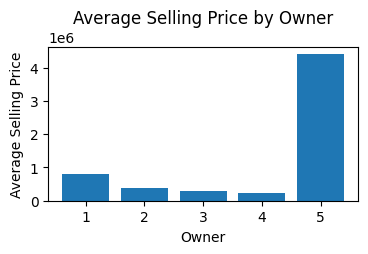

In [292]:
import matplotlib.pyplot as plt

avg_price_by_owner = df.groupby("owner")["selling_price"].mean()
print(avg_price_by_owner)
plt.figure(figsize=(4, 2))
plt.bar(avg_price_by_owner.index, avg_price_by_owner.values)
plt.xlabel("Owner")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Owner")
plt.show()

In [293]:
df[df["owner"] == 5]["selling_price"].mean()

np.float64(4403800.0)

In [294]:
# Remove rows with Test Drive Car
df = df[df["owner"] != 5]

In [295]:
# Final Dataset
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


## ======== My Preprocessing Process ========

From my understanding, preprocessing should be done before splitting, that means sometimes the testing set will have unexpected values or formats that do not follow the same pattern as training set so the preprocessing function that was already fitted to the training set cannot handle it properly.

In that case, Each column should have its own preprocessing rules to follow, some variations of data format from testing set are acceptable, but some will be treated as unknown value and they will be imputed.

In order to have imputation values, I have to do EDA first to obtain them. Also, imputation values should come from training set only, then use it to transform the testing set later

In [433]:
def data_cleaning(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()

    # Drop unused columns first to reduce size
    df = df.drop(columns=["torque"])

    # Drop rows that will definitely not be used
    df = df[~df["fuel"].isin(["CNG", "LPG"])]
    df = df[df["owner"] != "Test Drive Car"]

    # Remove Units
    df["mileage"] = df["mileage"].str.split(" ").str[0]
    df["engine"] = df["engine"].str.split(" ").str[0]
    df["max_power"] = df["max_power"].str.split(" ").str[0]

    # Numeric Type conversion
    df["mileage"] = df["mileage"].astype(float)
    df["engine"] = df["engine"].astype(float)
    df["max_power"] = df["max_power"].astype(float)

    # Fix Brand column
    df = df.rename(columns={"name": "brand"})
    df["brand"] = df["brand"].str.split(" ").str[0]

    return df

In [434]:
# Load dataset again so it doesn't affect previous cells
df_2 = pd.read_csv("Cars.csv")
df_2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [464]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_2, test_size=0.2, random_state=42)

In [465]:
print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")

Training set shape: (6502, 13)
Testing set shape: (1626, 13)


In [466]:
df_train = data_cleaning(df_train)
df_test = data_cleaning(df_test)

## Doing EDA to obtain imputation values from training set

In [467]:
impute_values = {}

### Brand

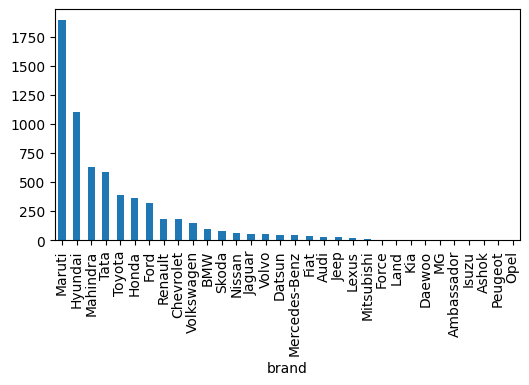

In [468]:
df_train["brand"].value_counts().plot(kind="bar", figsize=(6, 3))
# Brand is a categorical variable
# So mode should be used
impute_values["brand"] = df_train["brand"].mode()[0]

### year

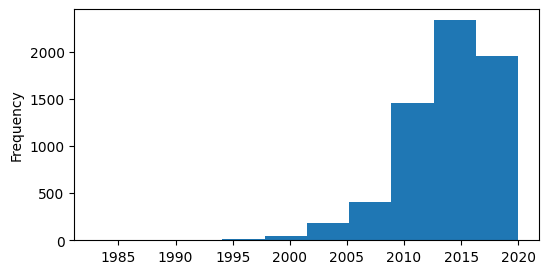

In [469]:
df_train["year"].plot(kind="hist", figsize=(6, 3))
# Year is a continuous variable which is not in normal distribution
# Even though year looks like a discrete variable, it is actually continuous
# So median should be used
impute_values["year"] = df_train["year"].median()

### km_driven

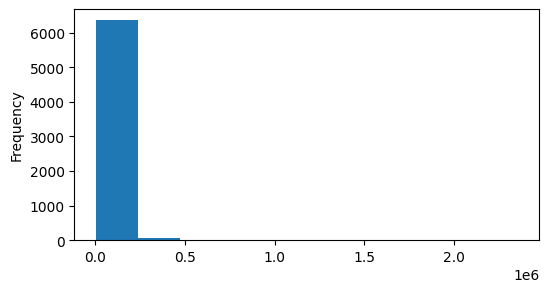

In [470]:
df_train["km_driven"].plot(kind="hist", figsize=(6, 3))
# km_driven is a continuous variable which is not in normal distribution
# It's also very skewed and has some outliers
# So median should be used
impute_values["km_driven"] = df_train["km_driven"].median()

### fuel

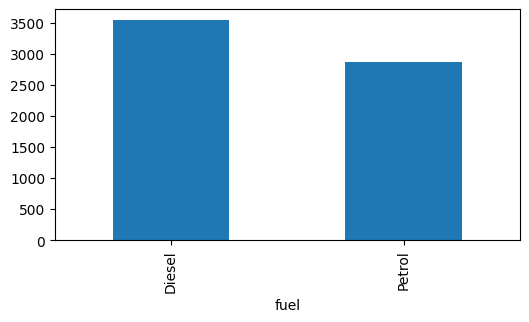

In [471]:
df_train["fuel"].value_counts().plot(kind="bar", figsize=(6, 3))
# Fuel is a categorical variable
# So mode should be used
impute_values["fuel"] = df_train["fuel"].mode()[0]

### seller_type

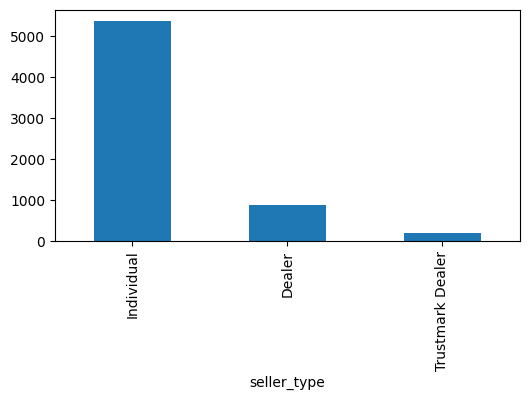

In [472]:
df_train["seller_type"].value_counts().plot(kind="bar", figsize=(6, 3))
# Seller_type is a categorical variable
# So mode should be used
impute_values["seller_type"] = df_train["seller_type"].mode()[0]

## transmission

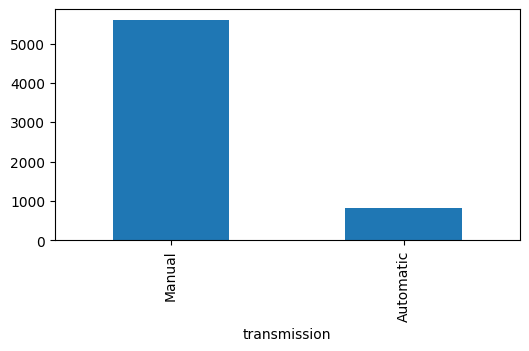

In [473]:
df_train["transmission"].value_counts().plot(kind="bar", figsize=(6, 3))
# Transmission is a categorical variable
# So mode should be used
impute_values["transmission"] = df_train["transmission"].mode()[0]

### owner

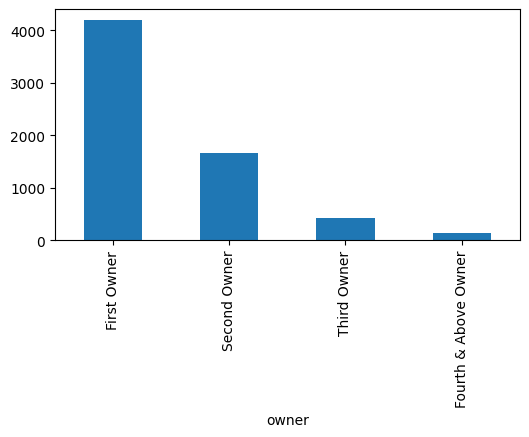

In [474]:
df_train["owner"].value_counts().plot(kind="bar", figsize=(6, 3))
# Owner is a categorical variable
# So mode should be used
impute_values["owner"] = df_train["owner"].mode()[0]

### mileage

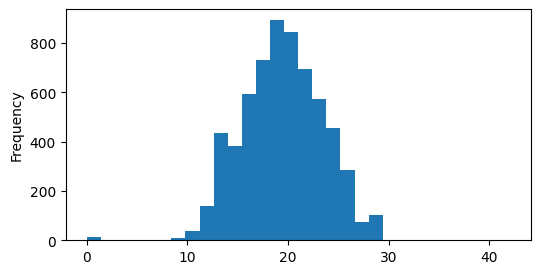

In [475]:
df_train["mileage"].plot(kind="hist", figsize=(6, 3), bins=30)
# Mileage is a continuous variable which is in normal distribution
# So mean should be used
impute_values["mileage"] = df_train["mileage"].mean()

### engine

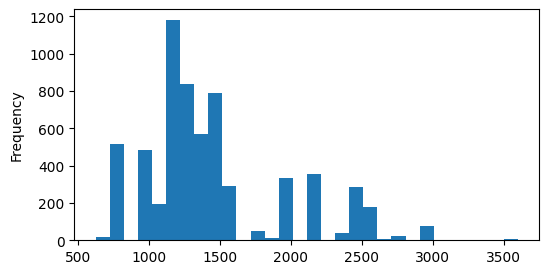

In [476]:
df_train["engine"].plot(kind="hist", figsize=(6, 3), bins=30)
# Engine is a continuous variable which is not in normal distribution
# So median should be used
impute_values["engine"] = df_train["engine"].median()

### max_power

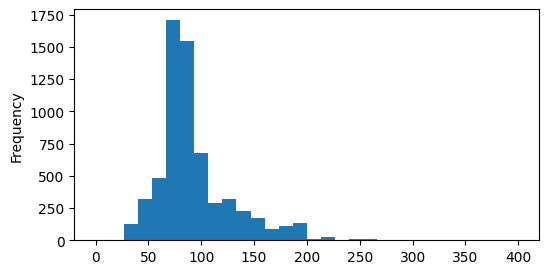

In [477]:
df_train["max_power"].plot(kind="hist", figsize=(6, 3), bins=30)
# Max_power is a continuous variable which is not in normal distribution
# So median should be used
impute_values["max_power"] = df_train["max_power"].median()

### seats

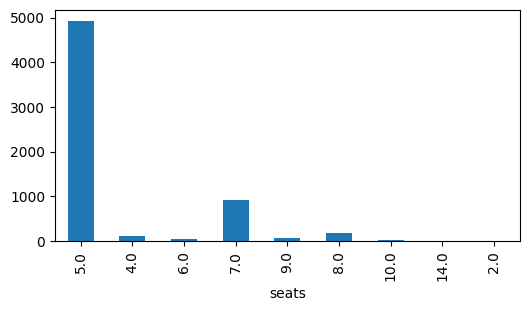

In [478]:
df_train["seats"].value_counts(sort=False).plot(kind="bar", figsize=(6, 3))
# Seats is a numeric variable but it is categorical in nature
# Because no car will never be labeled as having number like 0.987 seats
# So mode should be used
impute_values["seats"] = df_train["seats"].mode()[0]

### selling_price won't be imputed since it's a target variable

### Imputation Dictionary

In [479]:
impute_values

{'brand': 'Maruti',
 'year': np.float64(2015.0),
 'km_driven': np.float64(60000.0),
 'fuel': 'Diesel',
 'seller_type': 'Individual',
 'transmission': 'Manual',
 'owner': 'First Owner',
 'mileage': np.float64(19.38237973469714),
 'engine': np.float64(1248.0),
 'max_power': np.float64(82.85),
 'seats': np.float64(5.0)}

## Performing Imputation

In [481]:
df_train.isna().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          164
engine           164
max_power        160
seats            164
dtype: int64

In [482]:
df_test.isna().sum()

brand             0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          50
engine           50
max_power        48
seats            50
dtype: int64

In [483]:
# Impute missing values in both train and test set
df_train["mileage"] = df_train["mileage"].fillna(impute_values["mileage"])
df_train["engine"] = df_train["engine"].fillna(impute_values["engine"])
df_train["max_power"] = df_train["max_power"].fillna(impute_values["max_power"])
df_train["seats"] = df_train["seats"].fillna(impute_values["seats"])

# Note that impute values are from training set
df_test["mileage"] = df_test["mileage"].fillna(impute_values["mileage"])
df_test["engine"] = df_test["engine"].fillna(impute_values["engine"])
df_test["max_power"] = df_test["max_power"].fillna(impute_values["max_power"])
df_test["seats"] = df_test["seats"].fillna(impute_values["seats"])

In [484]:
df_train.isna().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [485]:
df_test.isna().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## more EDA

<Axes: title={'center': 'selling_price'}, xlabel='brand'>

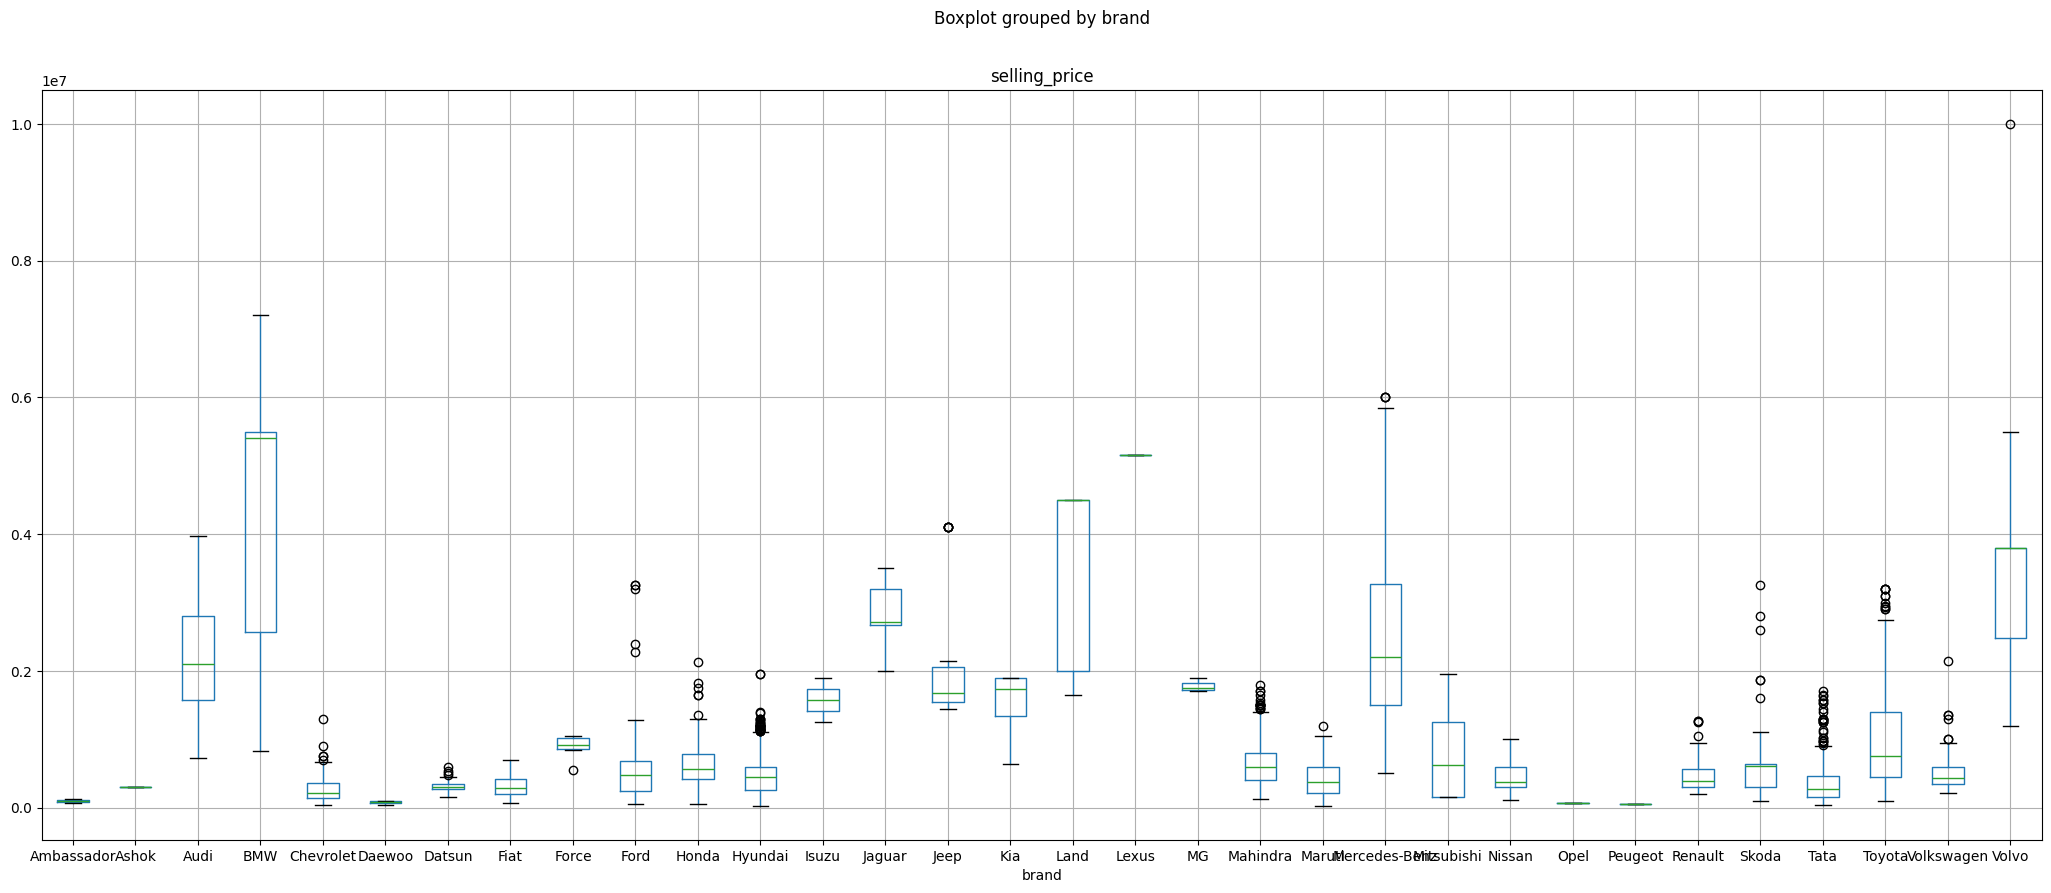

In [513]:
df_train.boxplot(column="selling_price", by="brand", figsize=(25, 10))
# Some brands have very high an large variance prices
# like BMW, Mercedes-Benz, Volvo
# Some brands have low prices and low price variances
# like Ambassador, Daewoo, Opel

<Axes: xlabel='year'>

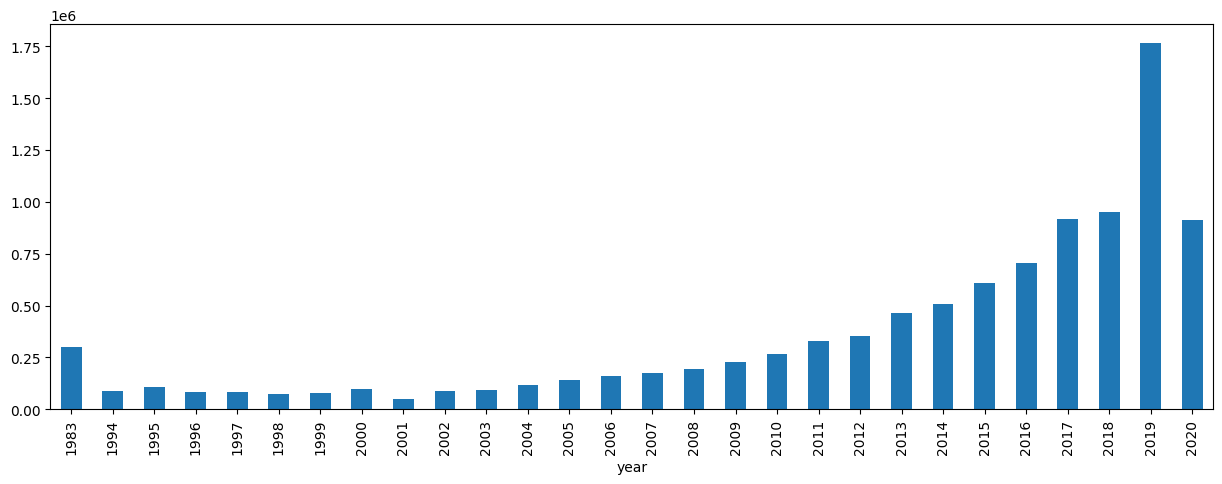

In [523]:
df_train.groupby("year")["selling_price"].mean().plot(
    kind="bar",
    figsize=(15, 5),
)
# There is a growing trend of average selling price per year
# There is a spike in 2019 that should be investigated more

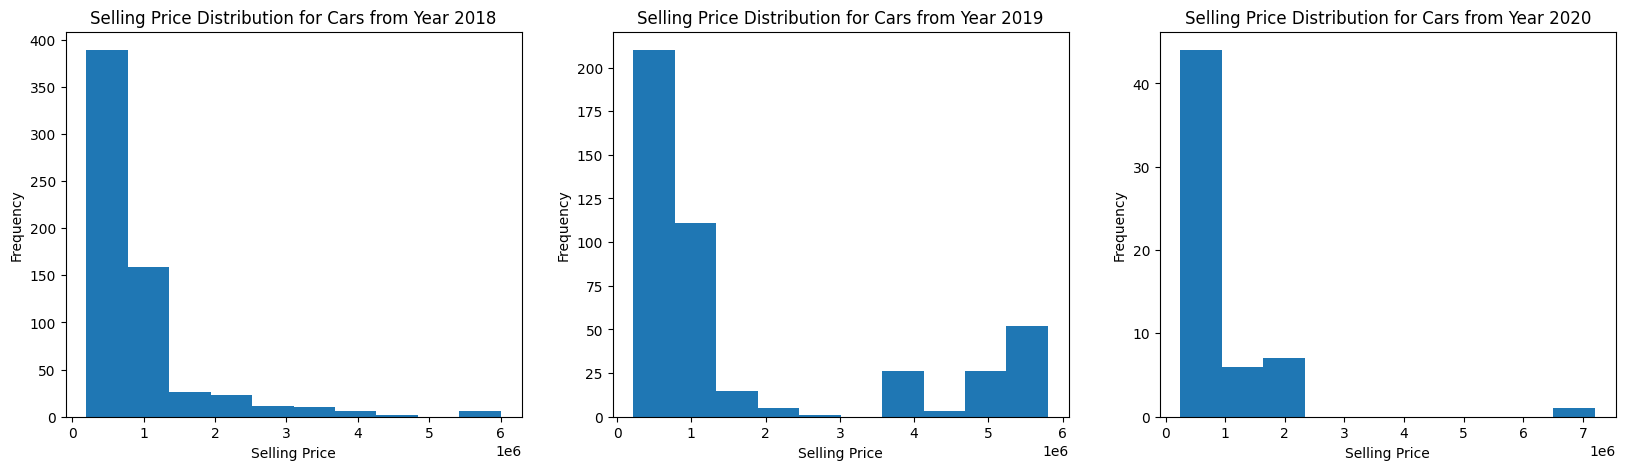

In [538]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.hist(df_train[df_train["year"] == 2018]["selling_price"])
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution for Cars from Year 2018")

plt.subplot(1, 3, 2)
plt.hist(df_train[df_train["year"] == 2019]["selling_price"])
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution for Cars from Year 2019")

plt.subplot(1, 3, 3)
plt.hist(df_train[df_train["year"] == 2020]["selling_price"])
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution for Cars from Year 2020")
plt.show()

# 2019 is clearly has more high price cars sold than neighboring years

<Axes: title={'center': 'Total Selling Price by Brand in 2019'}, xlabel='brand'>

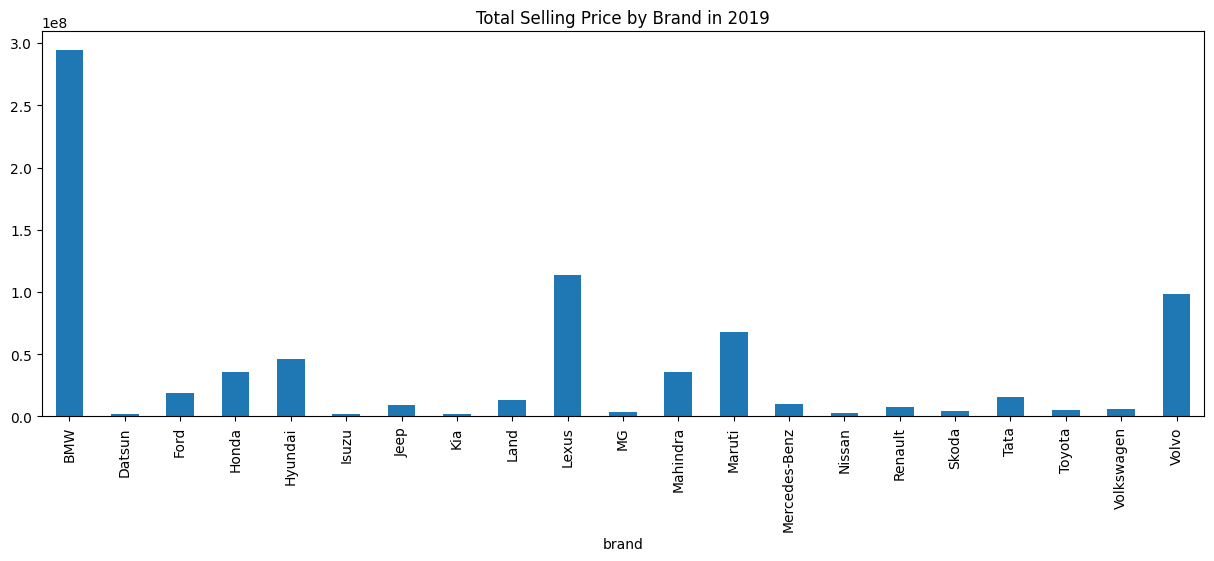

In [547]:
df_train[df_train["year"] == 2019].groupby("brand")["selling_price"].sum().plot(
    kind="bar",
    figsize=(15, 5),
    title="Total Selling Price by Brand in 2019",
)
# This clearly shows that in 2019, more high-end cars
#   like BMW, Lexus, Volvo were sold

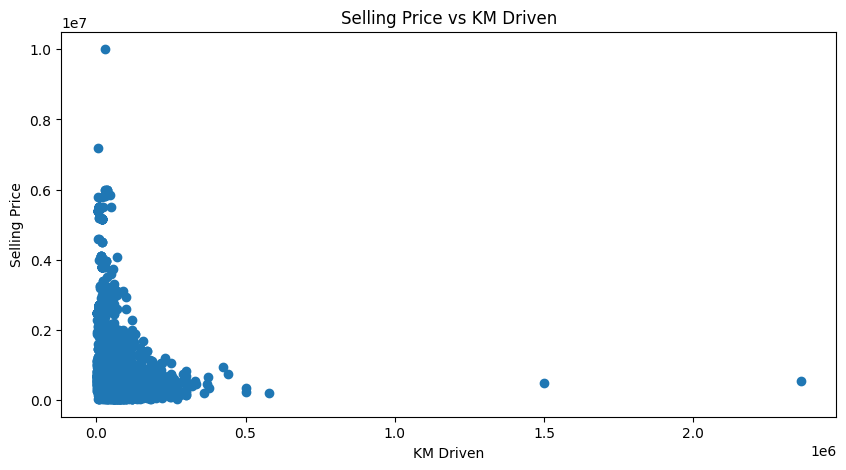

In [594]:
plt.figure(figsize=(10, 5))
plt.scatter(
    df_train["km_driven"],
    df_train["selling_price"],
)
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs KM Driven")
plt.show()
# This shows that more expensive cars tend to have lower km driven

<Axes: title={'center': 'selling_price'}, xlabel='fuel'>

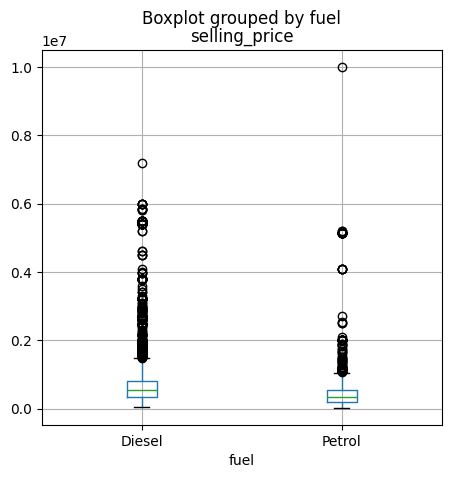

In [563]:
df_train.boxplot(column="selling_price", by="fuel", figsize=(5, 5))
# This shows that diesel cars tend to be priced higher

<Axes: title={'center': 'selling_price'}, xlabel='seller_type'>

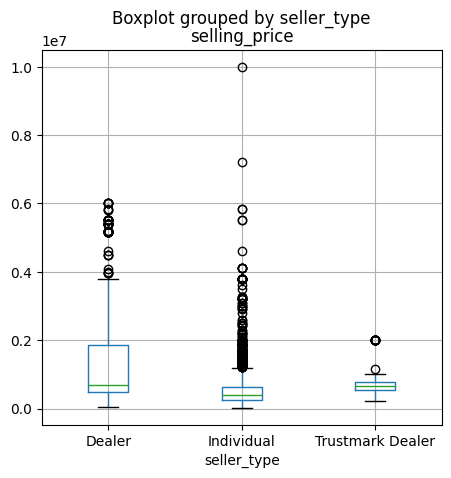

In [564]:
df_train.boxplot(column="selling_price", by="seller_type", figsize=(5, 5))
# This shows that individual sellers tend to price their cars inconsistently
# while dealers tend to price their cars more consistently
# But some individual sellers can also price their cars very high

In [568]:
df_train.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

<Axes: title={'center': 'Average Selling Price by Transmission Type'}, xlabel='Transmission', ylabel='Average Selling Price'>

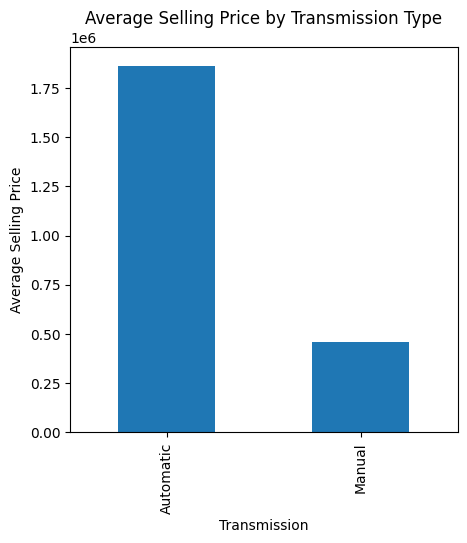

In [574]:
df_train.groupby("transmission")["selling_price"].mean().plot(
    kind="bar",
    figsize=(5, 5),
    title="Average Selling Price by Transmission Type",
    xlabel="Transmission",
    ylabel="Average Selling Price",
)
# This shows that cars with automatic transmission tend to be priced higher
# than manual transmission cars

<Axes: title={'center': 'Average Selling Price by Owner Type'}, xlabel='owner'>

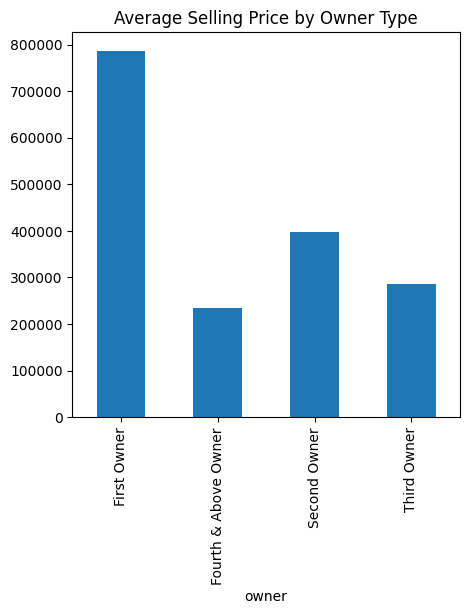

In [586]:
df_train.groupby("owner")["selling_price"].mean().plot(
    kind="bar",
    figsize=(5, 5),
    title="Average Selling Price by Owner Type",
)
# This shows that cars tend to be priced lower as the number of owners increase

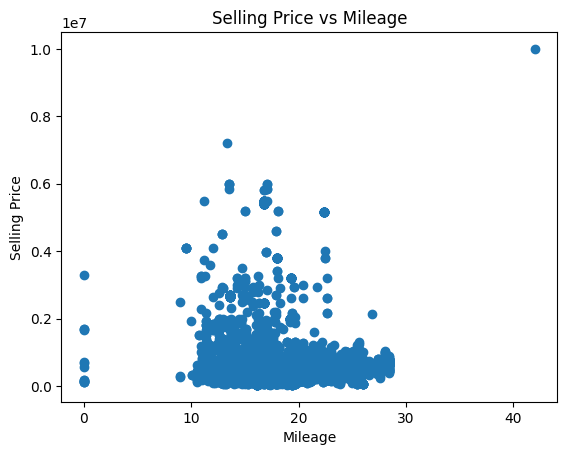

In [597]:
plt.scatter(df_train["mileage"], df_train["selling_price"])
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Mileage")
plt.show()
# The relationship is not very clear
# but there is a slight trend that higher mileage cars tend to be priced lower

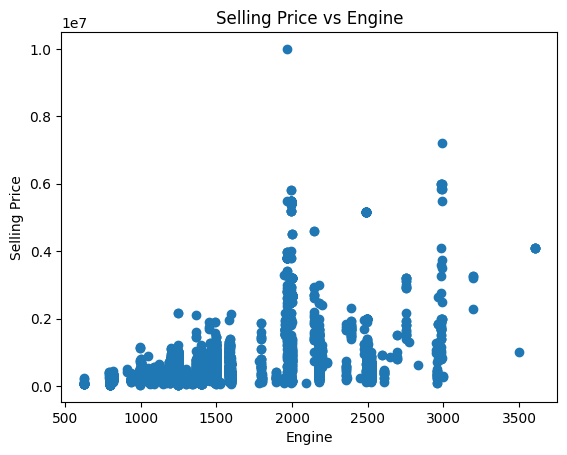

In [598]:
plt.scatter(df_train["engine"], df_train["selling_price"])
plt.xlabel("Engine")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Engine")
plt.show()
# This shows that cars with larger engines tend to be priced higher

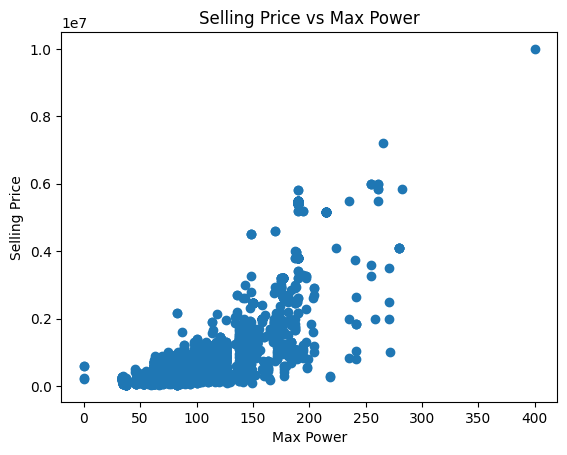

In [599]:
plt.scatter(df_train["max_power"], df_train["selling_price"])
plt.xlabel("Max Power")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Max Power")
plt.show()
# This shows that cars with higher max power tend to be priced higher

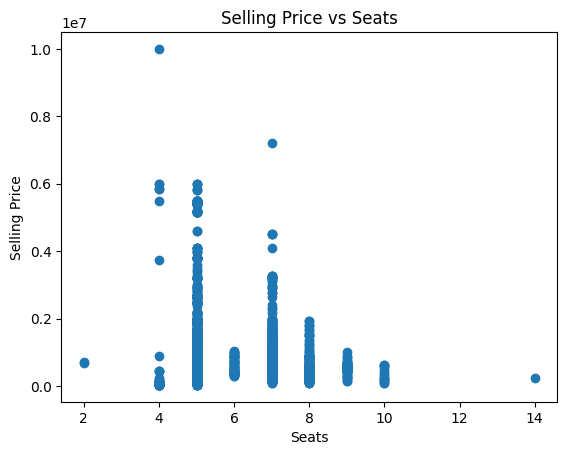

In [600]:
plt.scatter(df_train["seats"], df_train["selling_price"])
plt.xlabel("Seats")
plt.ylabel("Selling Price")
plt.title("Selling Price vs Seats")
plt.show()
# This shows that cars with more seats tend to be priced lower
# Which is a little bit counter-intuitive
# But I think lower seats are more luxurious cars
# And more seats are more like for utility use

## Encoding and Scaling

In [624]:
# cat_features = [
#     "brand",
#     "fuel",
#     "seller_type",
#     "transmission",
#     "owner",
# ]
# num_features = [
#     "year",
#     "km_driven",
#     "mileage",
#     "engine",
#     "max_power",
#     "seats",
# ]
# target = "selling_price"

In [604]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [605]:
# Brand has a lot of categories, so One-Hot Encoding might not be the best idea
# since it introduces a lot of dimensions, Instead, Label Encoding is used
le_brand = LabelEncoder()
df_train["brand"] = le_brand.fit_transform(df_train["brand"])
df_test["brand"] = le_brand.transform(df_test["brand"])

In [752]:
le_brand.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [606]:
# fuel has only 2 categories, so Label Encoding is used
le_fuel = LabelEncoder()
df_train["fuel"] = le_fuel.fit_transform(df_train["fuel"])
df_test["fuel"] = le_fuel.transform(df_test["fuel"])


In [607]:
# transmission has 2 categories, so Label Encoding is used
le_transmission = LabelEncoder()
df_train["transmission"] = le_transmission.fit_transform(df_train["transmission"])
df_test["transmission"] = le_transmission.transform(df_test["transmission"])


In [612]:
# owner has 4 categories, but they are ordinal, so Label Encoding is used
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
}
df_train["owner"] = df_train["owner"].map(owner_mapping)
df_test["owner"] = df_test["owner"].map(owner_mapping)


In [613]:
# seller_type has 3 categories, so One-Hot Encoding is used

# Use sparse_output=False to get a dense array directly
# So concatenation is easier
ohe_seller_type = OneHotEncoder(sparse_output=False, drop="first")

# Fit and transform on training set, transform on test set
seller_type_train_ohe = ohe_seller_type.fit_transform(df_train[["seller_type"]])
seller_type_test_ohe = ohe_seller_type.transform(df_test[["seller_type"]])

# Get the new column names to create DataFrames
seller_type_ohe_cols = ohe_seller_type.get_feature_names_out(["seller_type"])
df_seller_type_train_ohe = pd.DataFrame(
    seller_type_train_ohe,
    columns=seller_type_ohe_cols,
    index=df_train.index,
)
df_seller_type_test_ohe = pd.DataFrame(
    seller_type_test_ohe,
    columns=seller_type_ohe_cols,
    index=df_test.index,
)

# Concatenate the new columns to the original DataFrame and drop the original column
df_train = pd.concat([df_train, df_seller_type_train_ohe], axis=1)
df_test = pd.concat([df_test, df_seller_type_test_ohe], axis=1)
df_train = df_train.drop(columns=["seller_type"])
df_test = df_test.drop(columns=["seller_type"])

In [615]:
df_train.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
6518,28,2019,520000,2560,1,0,1,24.00,1199.0,83.81,5.0,1.0,0.0
6144,10,2013,300000,80000,1,1,2,19.40,1198.0,86.80,5.0,1.0,0.0
6381,11,2011,380000,150000,0,1,4,23.00,1396.0,90.00,5.0,1.0,0.0
438,20,2013,530000,120000,0,1,2,23.40,1248.0,74.00,5.0,1.0,0.0
5939,20,2017,335000,25000,1,1,1,23.95,998.0,67.05,5.0,1.0,0.0


In [616]:
df_test.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
1971,10,2004,198000,110000,1,1,3,12.8,1493.0,100.00,5.0,1.0,0.0
4664,28,2014,500000,291977,0,1,1,14.0,2179.0,138.10,7.0,1.0,0.0
5448,20,2016,425000,70000,0,1,1,23.2,1248.0,73.94,5.0,1.0,0.0
3333,10,2006,150000,120000,1,1,2,16.9,1497.0,100.00,5.0,1.0,0.0
2316,20,2013,525000,69000,0,1,2,22.9,1248.0,74.00,5.0,1.0,0.0


In [625]:
# Scale numeric features if necessary
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = [
    "year",
    "km_driven",
    "mileage",
    "engine",
    "max_power",
    "seats",
]
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.transform(df_test[num_features])


In [626]:
df_train.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
6518,28,1.281987,520000,-1.152821,1,0,1,1.172992,-0.521641,-0.221731,-0.430521,1.0,0.0
6144,10,-0.199901,300000,0.169997,1,1,2,0.004476,-0.523645,-0.137237,-0.430521,1.0,0.0
6381,11,-0.693863,380000,1.365726,0,1,4,0.918966,-0.126955,-0.046808,-0.430521,1.0,0.0
438,20,-0.199901,530000,0.853271,0,1,2,1.020577,-0.423471,-0.498953,-0.430521,1.0,0.0
5939,20,0.788025,335000,-0.769504,1,1,1,1.160290,-0.924342,-0.695354,-0.430521,1.0,0.0


In [627]:
df_test.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
1971,10,-2.422733,198000,0.682453,1,1,3,-1.672090,0.067383,0.235783,-0.430521,1.0,0.0
4664,28,0.047081,500000,3.790956,0,1,1,-1.367260,1.441773,1.312455,1.675668,1.0,0.0
5448,20,0.541043,425000,-0.000821,0,1,1,0.969771,-0.423471,-0.500649,-0.430521,1.0,0.0
3333,10,-1.928770,150000,0.853271,1,1,2,-0.630587,0.075397,0.235783,-0.430521,1.0,0.0
2316,20,-0.199901,525000,-0.017903,0,1,2,0.893564,-0.423471,-0.498953,-0.430521,1.0,0.0


In [628]:
print(df_train.shape)
print(df_test.shape)

(6421, 13)
(1607, 13)


## Prepare for Model Training

### For the first training I will use all features

In [632]:
target = "selling_price"

X_train = df_train.drop(columns=[target])
y_train = df_train[target]
X_test = df_test.drop(columns=[target])
y_test = df_test[target]

In [633]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6421, 12)
(6421,)
(1607, 12)
(1607,)


In [640]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [642]:
# Declare two models for both algorithms to compare no log vs log transformation

lr = LinearRegression()
lr_log = LinearRegression()
rf = RandomForestRegressor(random_state=42)
rf_log = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr_log.fit(X_train, np.log(y_train))  # Use log transformation to stabilize big numbers
rf_log.fit(X_train, np.log(y_train))  # Use log transformation to stabilize big numbers

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr_log = np.exp(lr_log.predict(X_test))  # Inverse of log transformation
y_pred_rf_log = np.exp(rf_log.predict(X_test))  # Inverse of log transformation

print("Linear Regression without log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))
print()
print("Linear Regression with log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_lr_log))
print("R2:", r2_score(y_test, y_pred_lr_log))
print()
print("Random Forest without log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))
print()
print("Random Forest with log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_rf_log))
print("R2:", r2_score(y_test, y_pred_rf_log))

# WOW, log transformation really improved the model performance

Linear Regression without log transformation:
MSE: 196880271520.98172
R2: 0.6923800578614293

Linear Regression with log transformation:
MSE: 88821891150.21065
R2: 0.8612182683151453

Random Forest without log transformation:
MSE: 18446818737.507668
R2: 0.971177359372607

Random Forest with log transformation:
MSE: 17378746490.26027
R2: 0.9728461925185581


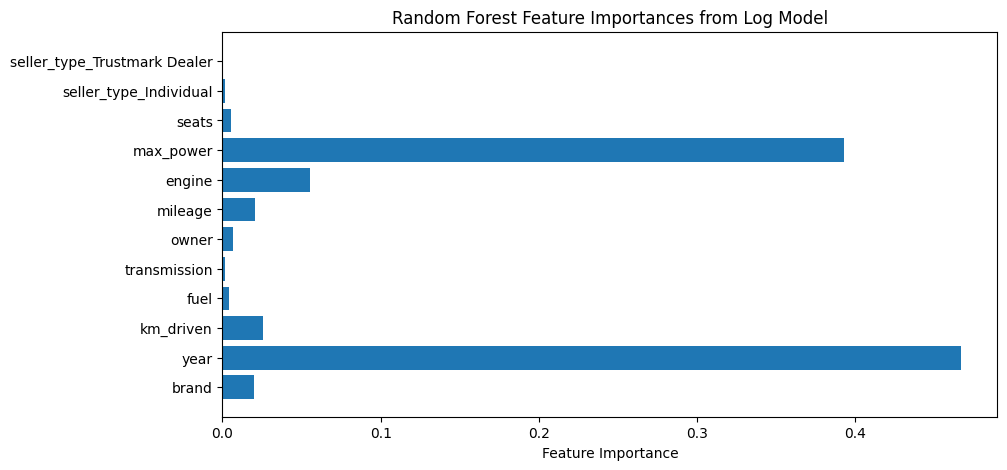

In [646]:
importances = rf_log.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances from Log Model")
plt.show()

### For second trainning, I will use some selected features

from feature importance these might be the best predictor

seats, max_power, engine, mileage, owner, fuel, km_driven, year, brand

In [647]:
selected_features = [
    "seats",
    "max_power",
    "engine",
    "mileage",
    "owner",
    "fuel",
    "km_driven",
    "year",
    "brand",
]
X_train = df_train[selected_features]
y_train = df_train[target]
X_test = df_test[selected_features]
y_test = df_test[target]

In [648]:
# Try again with selected features

lr = LinearRegression()
lr_log = LinearRegression()
rf = RandomForestRegressor(random_state=42)
rf_log = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr_log.fit(X_train, np.log(y_train))  # Use log transformation to stabilize big numbers
rf_log.fit(X_train, np.log(y_train))  # Use log transformation to stabilize big numbers

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr_log = np.exp(lr_log.predict(X_test))  # Inverse of log transformation
y_pred_rf_log = np.exp(rf_log.predict(X_test))  # Inverse of log transformation

print("Linear Regression without log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))
print()
print("Linear Regression with log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_lr_log))
print("R2:", r2_score(y_test, y_pred_lr_log))
print()
print("Random Forest without log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))
print()
print("Random Forest with log transformation:")
print("MSE:", mean_squared_error(y_test, y_pred_rf_log))
print("R2:", r2_score(y_test, y_pred_rf_log))

# Some how first 3 models performed worse than before
# But Random Forest with log transformation performed slightly better

Linear Regression without log transformation:
MSE: 218267416345.6799
R2: 0.6589632395959093

Linear Regression with log transformation:
MSE: 120787074115.41101
R2: 0.811273559999585

Random Forest without log transformation:
MSE: 18545196928.77422
R2: 0.9710236461880847

Random Forest with log transformation:
MSE: 16993161951.995321
R2: 0.9734486576230312


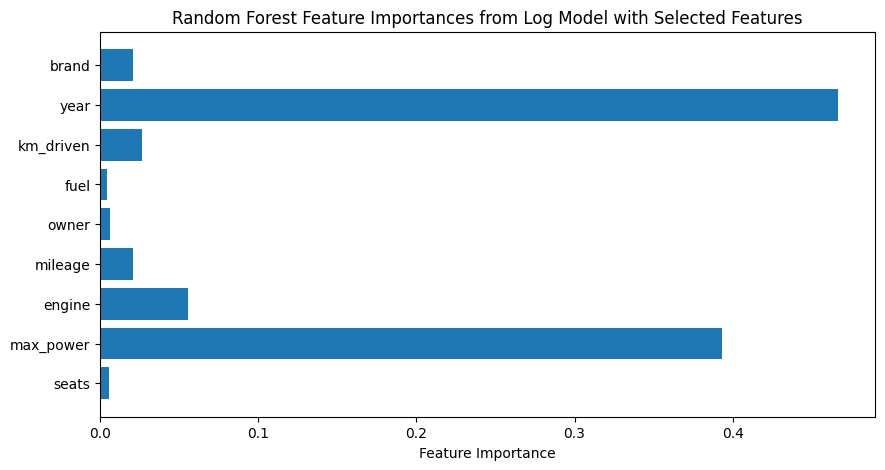

In [650]:
importances = rf_log.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances from Log Model with Selected Features")
plt.show()

## Prepare the whole pipeline from preprocessing to prediction
1. After data set loaded, it should be clean and formatted using data_cleaning function above.
2. Data splitted into train/test and pass through pipeline properly to avoid data leakage.
3. Pipeline should have multiple imputers for each features.
4. Pipeline should include model so that it can be saved and predict out of the box.

Note: For this part, I will load dataset again, clean, split, and fit it through the pipeline with all the features because the selected features above don't really improve much overall, also so i can save preprocessors and model into one file and use it to predict in the backend.

In [764]:
import joblib
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

df_original = pd.read_csv("Cars.csv")

In [765]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [766]:
df_train_final, df_test_final = train_test_split(df_original, test_size=0.2, random_state=42)

In [767]:
# This function is copied from above


def data_cleaning(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()

    # Drop unused columns first to reduce size
    df = df.drop(columns=["torque"])

    # Drop rows that will definitely not be used
    df = df[~df["fuel"].isin(["CNG", "LPG"])]
    df = df[df["owner"] != "Test Drive Car"]

    # Remove Units
    df["mileage"] = df["mileage"].str.split(" ").str[0]
    df["engine"] = df["engine"].str.split(" ").str[0]
    df["max_power"] = df["max_power"].str.split(" ").str[0]

    # Numeric Type conversion
    df["mileage"] = df["mileage"].astype(float)
    df["engine"] = df["engine"].astype(float)
    df["max_power"] = df["max_power"].astype(float)

    # Fix Brand column
    df = df.rename(columns={"name": "brand"})
    df["brand"] = df["brand"].str.split(" ").str[0]

    return df


# This process doesn't include fillna, encoding, scaling
df_train_final = data_cleaning(df_train_final)
df_test_final = data_cleaning(df_test_final)

In [783]:
df_train_final

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6518,Tata,2019,520000,2560,Petrol,Individual,Automatic,First Owner,24.00,1199.0,83.81,5.0
6144,Honda,2013,300000,80000,Petrol,Individual,Manual,Second Owner,19.40,1198.0,86.80,5.0
6381,Hyundai,2011,380000,150000,Diesel,Individual,Manual,Fourth & Above Owner,23.00,1396.0,90.00,5.0
438,Maruti,2013,530000,120000,Diesel,Individual,Manual,Second Owner,23.40,1248.0,74.00,5.0
5939,Maruti,2017,335000,25000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5226,Mahindra,2009,475000,120000,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,7.0
5390,Maruti,2014,530000,80000,Diesel,Individual,Manual,Second Owner,23.40,1248.0,74.00,5.0
860,Hyundai,2016,576000,35000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,5.0
7603,Maruti,2019,770000,27000,Diesel,Individual,Manual,First Owner,28.40,1248.0,74.02,5.0


In [784]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6421 entries, 6518 to 7270
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          6421 non-null   object 
 1   year           6421 non-null   int64  
 2   selling_price  6421 non-null   int64  
 3   km_driven      6421 non-null   int64  
 4   fuel           6421 non-null   object 
 5   seller_type    6421 non-null   object 
 6   transmission   6421 non-null   object 
 7   owner          6421 non-null   object 
 8   mileage        6257 non-null   float64
 9   engine         6257 non-null   float64
 10  max_power      6261 non-null   float64
 11  seats          6257 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 652.1+ KB


In [ ]:
from sklearn.impute import SimpleImputer

# Define transformers for each feature group
brand_le = (
    "brand_le",
    Pipeline(
        [
            # Pre-imputer for handling missing values before encoding
            ("pre_imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
            ("post_imputer", SimpleImputer(strategy="most_frequent")),
            # Post-imputer for handling any NaN introduced by unknown categories during encoding
            # So the pipeline is robust to unseen categories in production data
            # This won't happen if frontend limits the choices to existing categories only
            # But it's better to be safe than sorry
        ],
    ),
    ["brand"],
)

fuel_le = (
    "fuel_le",
    Pipeline(
        [
            ("pre_imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
            ("post_imputer", SimpleImputer(strategy="most_frequent")),
        ],
    ),
    ["fuel"],
)

transmission_le = (
    "transmission_le",
    Pipeline(
        [
            ("pre_imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
            ("post_imputer", SimpleImputer(strategy="most_frequent")),
        ],
    ),
    ["transmission"],
)

owner_le = (
    "owner_le",
    Pipeline(
        [
            ("pre_imputer", SimpleImputer(strategy="most_frequent")),
            (
                "encoder",
                OrdinalEncoder(
                    categories=[
                        [
                            "First Owner",
                            "Second Owner",
                            "Third Owner",
                            "Fourth & Above Owner",
                        ],
                    ],
                    handle_unknown="use_encoded_value",
                    unknown_value=np.nan,
                ),
            ),
            ("post_imputer", SimpleImputer(strategy="most_frequent")),
        ],
    ),
    ["owner"],
)

seller_type_ohe = (
    "seller_type_ohe",
    Pipeline(
        [
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")),
        ],
    ),
    ["seller_type"],
)

num_scaler = (
    "num_scaler",
    Pipeline(
        [
            (
                "imputer",
                ColumnTransformer(
                    transformers=[
                        ("year_imputer", SimpleImputer(strategy="median"), ["year"]),
                        ("km_imputer", SimpleImputer(strategy="median"), ["km_driven"]),
                        ("mileage_imputer", SimpleImputer(strategy="mean"), ["mileage"]),
                        ("engine_imputer", SimpleImputer(strategy="median"), ["engine"]),
                        ("max_power_imputer", SimpleImputer(strategy="median"), ["max_power"]),
                        ("seats_imputer", SimpleImputer(strategy="most_frequent"), ["seats"]),
                    ],
                    remainder="passthrough",
                ),
            ),
            ("scaler", StandardScaler()),
        ],
    ),
    ["year", "km_driven", "mileage", "engine", "max_power", "seats"],
)

# Combine all transformers into the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        brand_le,
        fuel_le,
        transmission_le,
        owner_le,
        seller_type_ohe,
        num_scaler,
    ],
    remainder="passthrough",
    verbose_feature_names_out=True,
)

# Build the pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state=42)),
    ],
)


In [772]:
X_train_final = df_train_final.drop(columns=["selling_price"])
X_test_final = df_test_final.drop(columns=["selling_price"])
y_train_final = df_train_final["selling_price"]
y_test_final = df_test_final["selling_price"]

In [773]:
print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)

(6421, 11)
(6421,)
(1607, 11)
(1607,)


In [774]:
X_train_final.columns

Index(['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [775]:
# Fit pipeline
pipeline.fit(X_train_final, np.log(y_train_final))

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('brand_le', ...), ('fuel_le', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [776]:
y_pred_final = pipeline.predict(X_test_final)

In [ ]:
print(mean_squared_error(y_test_final, np.exp(y_pred_final)))
print(r2_score(y_test_final, np.exp(y_pred_final)))

# The performance is similar to previous best model with slight variation
# probably due to encoding steps which
# - Manually done encoding use LabelEncoder and pd.get_dummies for One-Hot Encoding
# - Pipeline encoding use OrdinalEncoder and OneHotEncoder
# - LabelEncoder object can't be used in pipeline for some reason from package's design
# - pd.get_dummies can't be used in pipeline because it is not a transformer class
# - OrdinalEncoder is similar to LabelEncoder
# - But OrdinalEncoder might give different encoding order than LabelEncoder
# - However, this pipeline is much cleaner and easier to use

17255870470.57974
0.9730381828778375


In [778]:
# Sample 3 inferences
print("Predict:", np.exp(pipeline.predict(X_test_final[:3])))
print("Actual:", y_test_final[:3].values)

Predict: [144042.76608739 543978.14584711 426373.11498133]
Actual: [198000 500000 425000]


In [779]:
# Save pipeline
joblib.dump(pipeline, "./app/backend/model/car_price_pipeline.joblib")

['./app/backend/model/car_price_pipeline.joblib']

In [780]:
# Load pipeline and predict on new sample
loaded_pipeline = joblib.load("./app/backend/model/car_price_pipeline.joblib")

In [782]:
y_pred = loaded_pipeline.predict(X_test_final[:3])

print("Predict:", np.exp(y_pred))
print("Actual:", y_test_final[:3].values)

Predict: [144042.76608739 543978.14584711 426373.11498133]
Actual: [198000 500000 425000]


In [ ]:
# Will be used in frontend
cat_features = ["brand", "fuel", "seller_type", "transmission", "owner"]
cat_values_dict = {col: df_train_final[col].dropna().unique().tolist() for col in cat_features}
print(cat_values_dict)

{'brand': ['Tata', 'Honda', 'Hyundai', 'Maruti', 'Mahindra', 'Volkswagen', 'Toyota', 'Force', 'Skoda', 'BMW', 'Fiat', 'Ford', 'Jaguar', 'Renault', 'Jeep', 'Nissan', 'Chevrolet', 'Datsun', 'Mercedes-Benz', 'Lexus', 'Mitsubishi', 'Volvo', 'Audi', 'Ashok', 'Peugeot', 'Land', 'Ambassador', 'Isuzu', 'MG', 'Opel', 'Daewoo', 'Kia'], 'fuel': ['Petrol', 'Diesel'], 'seller_type': ['Individual', 'Dealer', 'Trustmark Dealer'], 'transmission': ['Automatic', 'Manual'], 'owner': ['First Owner', 'Second Owner', 'Fourth & Above Owner', 'Third Owner']}


# Task 2

## Summary